In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('ny.csv')

In [49]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [67]:

features = ['BEDS', 'BATH', 'PROPERTYSQFT']

X = df[features]
y = df['PRICE']


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 19243479524898.832
R² Score: 0.2362132944729699
Coefficients: [-332914.20431293  862156.58890248    1326.75439127]
Intercept: -1382862.7507465594


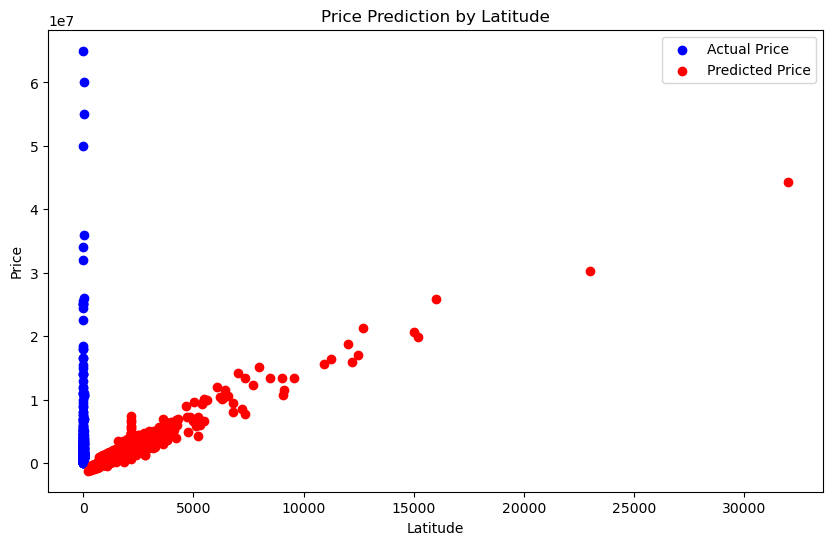

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['BEDS'], y_test, color='blue', label='Actual Price')  # Actual values
plt.scatter(X_test['PROPERTYSQFT'], y_pred, color='red', label='Predicted Price')  # Predicted values
plt.title('Price Prediction by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.legend()
plt.show()

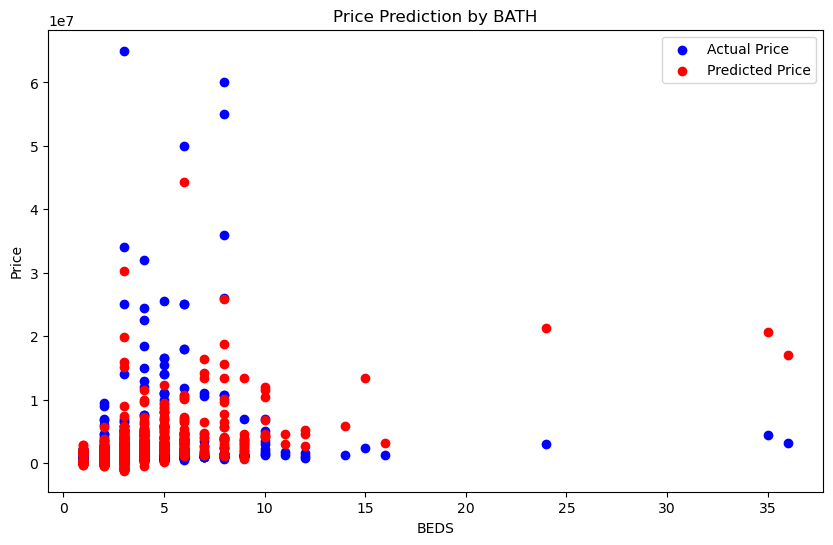

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['BEDS'], y_test, color='blue', label='Actual Price')  # Actual values
plt.scatter(X_test['BEDS'], y_pred, color='red', label='Predicted Price')  # Predicted values
plt.title('Price Prediction by BATH')
plt.xlabel('BEDS')
plt.ylabel('Price')
plt.legend()
plt.show()

Median

In [101]:
median = df['PRICE'].median()

In [107]:
df['Category'] = (df['PRICE'] <= median).astype(int)

In [109]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Category
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,1
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,0
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,1
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,1
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,0
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,1
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777,0
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424,0
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,1
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694,1
